<a href="https://colab.research.google.com/github/ilahamusayeva93/Airline-Data-Analysis-Time-Series/blob/main/Biopython.exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from Bio import Entrez, SeqIO

In [2]:
!pip install Biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.5 MB/s eta 0:00:00


In [4]:
Entrez.email="ilahamusayeva06@gmail.com"
gene_name="BRCA2"
search_result=Entrez.esearch(db="nucleotide",term=gene_name, retmax=10)
record=Entrez.read(search_result)
id_list=record['IdList']
print(id_list)

['2688122360', '2687981466', '2687961781', '2687961779', '2687961777', '2687961775', '2687961773', '2687961771', '2687961769', '2687961767']


In [7]:
with Entrez.efetch(db="nucleotide",id=id_list[0],rettype="gb",retmode="text") as handle:
  record=SeqIO.read(handle,"genbank")
print(f"Description for ID {id_list[0]}: {record.description}")
print(f"Sequence for ID {id_list[0]}: {record.seq[:50]}...")

Description for ID 2688122360: Scomber scombrus genome assembly, contig: fScoSco3.1_contig_2773_1, whole genome shotgun sequence
Sequence for ID 2688122360: CTTCCCCAACACTGAGGAGAGGAGAGGAAGAGCAGAGGAGAGAAGAGGAG...


In [8]:
import time
for id in id_list:
  with Entrez.efetch(db="nucleotide",id=id,rettype="gb",retmode="text") as handle:
    record=SeqIO.read(handle,"genbank")
    print(f"Processing ID: {id}")
    print(f"Description: {record.description}")
time.sleep(1)

Processing ID: 2688122360
Description: Scomber scombrus genome assembly, contig: fScoSco3.1_contig_2773_1, whole genome shotgun sequence
Processing ID: 2687981466
Description: PREDICTED: Prinia subflava BRCA2 and CDKN1A interacting protein (BCCIP), mRNA
Processing ID: 2687961781
Description: PREDICTED: Prinia subflava EMSY transcriptional repressor, BRCA2 interacting (EMSY), transcript variant X11, mRNA
Processing ID: 2687961779
Description: PREDICTED: Prinia subflava EMSY transcriptional repressor, BRCA2 interacting (EMSY), transcript variant X10, mRNA
Processing ID: 2687961777
Description: PREDICTED: Prinia subflava EMSY transcriptional repressor, BRCA2 interacting (EMSY), transcript variant X9, mRNA
Processing ID: 2687961775
Description: PREDICTED: Prinia subflava EMSY transcriptional repressor, BRCA2 interacting (EMSY), transcript variant X8, mRNA
Processing ID: 2687961773
Description: PREDICTED: Prinia subflava EMSY transcriptional repressor, BRCA2 interacting (EMSY), transcript v

In [13]:
def calculate_gc_content(seq):
  gc_count=seq.count("G")+seq.count("C")
  gc_content=(gc_count/len(seq))*100
  return gc_content

for id in id_list:
  with Entrez.efetch(db="nucleotide",id=id, rettype="gb",retmode="text") as handle:
    record=SeqIO.read(handle,"genbank")
    print(f"ID: {id}")
    print(f"Length: {len(record.seq)}")
    print(f"GC Content: {calculate_gc_content(record.seq)}%")



ID: 2688122360
Length: 853034
GC Content: 39.03080064803982%
ID: 2687981466
Length: 1271
GC Content: 52.16365066876475%
ID: 2687961781
Length: 5136
GC Content: 44.898753894081%
ID: 2687961779
Length: 5232
GC Content: 44.896788990825684%
ID: 2687961777
Length: 5261
GC Content: 44.896407527086104%
ID: 2687961775
Length: 5234
GC Content: 45.41459686664119%
ID: 2687961773
Length: 5272
GC Content: 44.87860394537178%
ID: 2687961771
Length: 5296
GC Content: 45.524924471299094%
ID: 2687961769
Length: 5385
GC Content: 45.51532033426184%
ID: 2687961767
Length: 5292
GC Content: 45.33257747543462%


In [14]:
print("Features:")
for feature in record.features[:5]:
  print(feature)

Features:
type: source
location: [0:5292](+)
qualifiers:
    Key: chromosome, Value: ['3']
    Key: db_xref, Value: ['taxon:208062']
    Key: dev_stage, Value: ['adult']
    Key: ecotype, Value: ['Zambia']
    Key: isolate, Value: ['CZ2003']
    Key: mol_type, Value: ['mRNA']
    Key: organism, Value: ['Prinia subflava']
    Key: sex, Value: ['female']
    Key: tissue_type, Value: ['muscle, liver']

type: gene
location: [0:5292](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:134548740']
    Key: gene, Value: ['EMSY']
    Key: note, Value: ['EMSY transcriptional repressor, BRCA2 interacting; Derived by automated computational analysis using gene prediction method: Gnomon. Supporting evidence includes similarity to: 1 Protein']

type: CDS
location: [95:3962](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:134548740']
    Key: gene, Value: ['EMSY']
    Key: product, Value: ['BRCA2-interacting transcriptional repressor EMSY isoform X1']
    Key: protei

In [15]:
protein_seq=record.seq.translate()
print(f"Protein Sequence for {id}: {protein_seq[:300]}...")

Protein Sequence for 2687961767: AGAAFGGTIGGAGARRPRGEAELCGSTDTREGCLWCGQLFWISVGMSARGSFANWNWRPMQVSSVPYVHRETLQKRRRIFLENSLKCLVFQQSDIELKFGEQLMMND*QRLHTTCLDQTALLSGP*KVVDWCH*CHDLFHKQLLLSPPTPLPMQPFSTTRLFQSPQKLETKKWWFAIPTQVPLQPQHLPLFQVAV*QQ*SPPDLPVQPPM*SSCQVEVLFTSKVSAAQMTMKSPAKDGEQILLVLPLFS*KKSRRP*LLSLKLSQCL*VGAPK*VI*CRALPTPYHHTCRL*K*PSLSPQ...


In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [17]:
!pip install biopython matplotlib


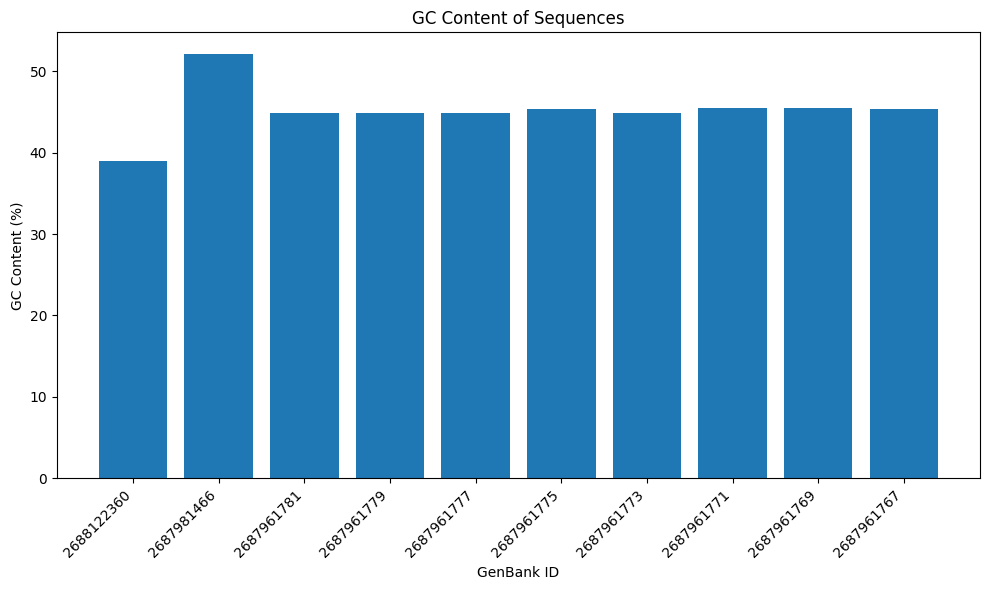

In [19]:
gc_contents=[]
for id in id_list:
  with Entrez.efetch(db="nucleotide",id=id, rettype="gb",retmode="text") as handle:
    record=SeqIO.read(handle,"genbank")
    gc_content=calculate_gc_content(record.seq)
    gc_contents.append(gc_content)

plt.figure(figsize=(10,6))
plt.bar(range(len(id_list)),gc_contents,tick_label=id_list)
plt.xticks(rotation=45,ha="right")
plt.xlabel("GenBank ID")
plt.ylabel("GC Content (%)")
plt.title("GC Content of Sequences")
plt.tight_layout()
plt.show()

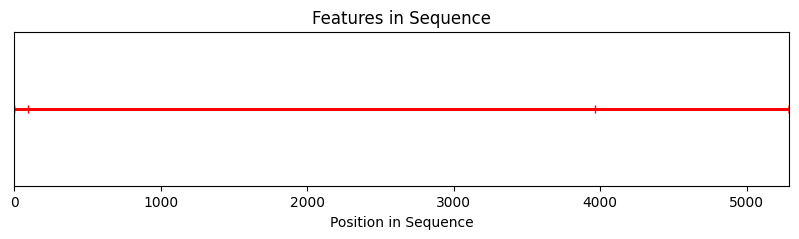

In [22]:
fig,ax=plt.subplots(figsize=(10,2))
ax.set_xlim(0,len(record.seq))
ax.set_ylim(0,1)

for feature in record.features[:5]:
  start=feature.location.start
  end=feature.location.end
  ax.plot([start,end],[0.5,0.5],marker='|', color='r', linestyle='-', lw=2)

ax.set_yticks([])
plt.title("Features in Sequence")
plt.xlabel("Position in Sequence")
plt.show()


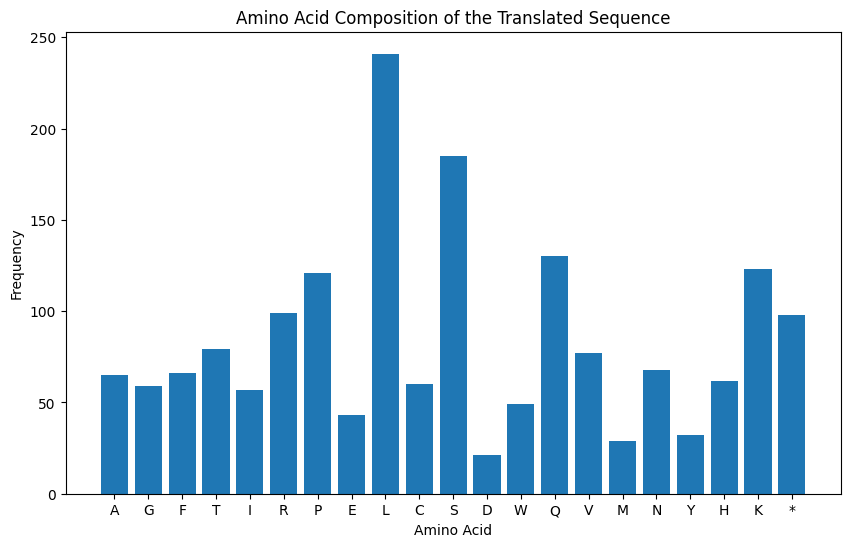

In [21]:
from collections import Counter

# Assuming `protein_seq` is defined as before

amino_acid_counts = Counter(protein_seq)

plt.figure(figsize=(10, 6))
plt.bar(amino_acid_counts.keys(), amino_acid_counts.values())
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Amino Acid Composition of the Translated Sequence")
plt.show()